In [4]:
import warnings

import readline
import rpy2.robjects

warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

%run ../notebook-init.py

# load R libraries                                                                                    
%R invisible(library(ggplot2))
%R invisible(library(fastcluster))
%R invisible(library(reshape))
%R invisible(library(reshape2))
%R invisible(library(gplots))
%R invisible(library(RSQLite))

#set up ggplot2 defaults                                                                              
%R theme_set(theme_gray(base_size=18))

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
import pandas as pd
from glob import glob

sbres = glob('../shortbred/FMTchrons2/*results.txt')

tbls = {}
for fname in sbres:
    tbl = pd.read_table(fname,header=0,index_col=0)
    tblname = fname.split('/')[-1]
    tblname = tblname.split('.')[0]
    rep = tblname.split('-')[2]
    time = tblname.split('-')[1]
    if time.lower() == 'pre_fmt':
        time = 0
    elif '4' in time:
        time = 4
    elif '8' in time:
        time = 8
        
    if rep not in tbls:
        tbls[rep] = {}
    tbls[rep][time] = tbl[['Count']]
    
    
subtbls={}

for rep, tblset in tbls.items():
        subtbls[rep] = pd.concat(tblset,axis=1)



pnl = pd.Panel(subtbls)

# How many AR gene families are present?


### Total?

In [6]:
d0 = pnl.minor_xs(pnl.minor_axis[0]).dropna(axis=1,thresh=1)
d4 = pnl.minor_xs(pnl.minor_axis[1]).dropna(axis=1,thresh=1)


d0_rep = d0.astype(bool).sum(axis=0)
d4_rep = d4.astype(bool).sum(axis=0)

num_gf_by_rep = pd.concat([d0_rep,d4_rep],axis=1)

d0_total = d0.sum(axis=1).astype(bool)
d4_total = d4.sum(axis=1).astype(bool)

print('Total number of gene families detected before FMT: {}'.format(d0_total.sum()))
print('Total number of gene families detected 4W after FMT: {}'.format(d4_total.sum()))



Total number of gene families detected before FMT: 82
Total number of gene families detected 4W after FMT: 88


In [33]:
r2at0 = d0['R1002']
r2at4 = d4['R1002']
r2at0 = r2at0[r2at0 != 0]
r2at4 = r2at4[r2at4 != 0]

pd.DataFrame({'pre':r2at0,'post':r2at4})


,post,pre
AAA22905,0.710176,NaN
AAA98484,0.195556,NaN
AAB03644,3.271115,NaN
AAB51122,189.906378,NaN
ABF69686,NaN,3.099912
ABG36114,1.022223,3.198322
APH6_5,5.140323,NaN
CAM12479,0.123792,6.225189
FluoroquinoloneResistantDNATopoisomerase_2,0.783705,NaN
FluoroquinoloneResistantDNATopoisomerase_32,0.359823,NaN


(polygon[GRID.polygon.1], polygon[GRID.polygon.2], polygon[GRID.polygon.3], polygon[GRID.polygon.4], text[GRID.text.5], text[GRID.text.6], text[GRID.text.7], text[GRID.text.8], text[GRID.text.9]) 


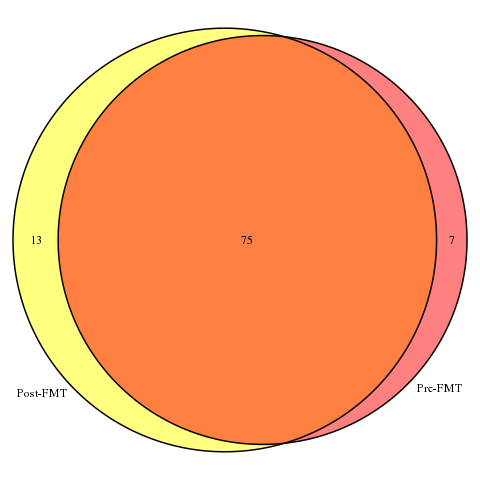

In [8]:
%%R -i d0_total,d4_total
library(VennDiagram)


atd0 <- names(d0_total[d0_total > 0])
atd4 <- names(d4_total[d4_total > 0])
over <- intersect(atd0,atd4)

draw.pairwise.venn(length(atd0),length(atd4),length(over),
                   category=c('Pre-FMT','Post-FMT'),
                   fill=heat.colors(2))

### Per replicate?

In [9]:
num_gf_by_rep

,0,1
R1001,51.0,19
R1002,5.0,38
R1003,NaN,25
R1004,31.0,24
R1005,23.0,22
R1006,47.0,59
R1007,22.0,45
R1008,NaN,36
R1009,9.0,53
R1011,19.0,25


# How Many AR gene families are gained? Lost?

### Per replicate?

In [10]:
present_d0 = d0.astype(bool)
present_d4 = d4.astype(bool)

new_at_d4 = (~present_d0).multiply(present_d4).sum(axis=0)
print(new_at_d4)
print(new_at_d4.mean())


R1001     7.0
R1002    35.0
R1003     NaN
R1004     5.0
R1005     9.0
R1006    18.0
R1007    26.0
R1008     NaN
R1009    45.0
R1011    11.0
R1012     NaN
R1014     3.0
R1015     6.0
R1017    11.0
R1018     6.0
R1020     0.0
R1021     2.0
R1022     0.0
dtype: float64
12.2666666667


In [11]:
only_at_d0 = (~present_d4).multiply(present_d0).sum(axis=0)
print(only_at_d0)
print(only_at_d0.mean())

R1001    39.0
R1002     2.0
R1003     NaN
R1004    12.0
R1005    10.0
R1006     6.0
R1007     3.0
R1008     NaN
R1009     1.0
R1011     5.0
R1012     NaN
R1014     4.0
R1015     7.0
R1017    28.0
R1018    12.0
R1020     2.0
R1021    32.0
R1022     4.0
dtype: float64
11.1333333333


### Total?

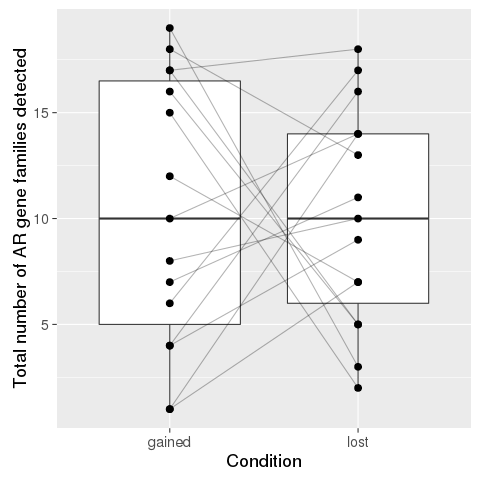

In [12]:
%%R -i new_at_d4,only_at_d0
m <- cbind(new_at_d4,only_at_d0)

narows <- apply(m,1,function(r){ 
                        is.na(sum(r))
                    })
m <- m[!narows,]
gf <- cbind(rownames(m),m)

colnames(gf) <- c('names','gained','lost')
gf <- rbind(
            cbind(rep('gained',nrow(gf)), gf[,c('names','gained')]),
            cbind(rep('lost',nrow(gf)),   gf[,c('names','lost')])
            )
colnames(gf) <- c('variable','names','value')
gf <- data.frame(gf)
gf$value <- as.numeric(gf$value)

numGF <- ggplot(gf, aes(x=variable,y=value)) +
        geom_boxplot() +
        geom_point(size=3) +
        ylab("Total number of AR gene families detected") +
        xlab("Condition")+
        geom_line(aes(group=names),alpha=0.3)
        theme_minimal() 


print(numGF)

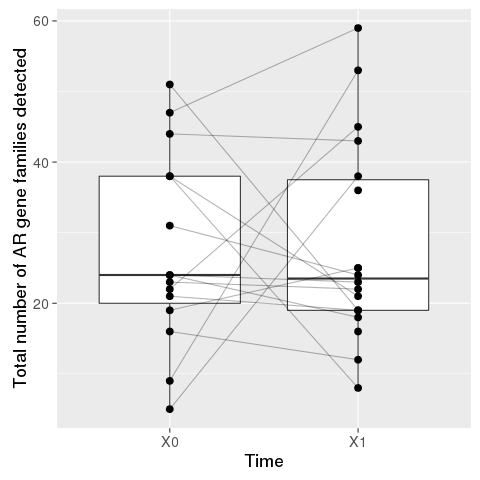

In [13]:
%%R -i num_gf_by_rep
gf <- cbind(rownames(num_gf_by_rep),num_gf_by_rep)

gf <- melt(data.frame(gf))
numGF <- ggplot(gf, aes(x=variable,y=value)) +
        geom_boxplot() +
        geom_point(size=3) +
        ylab("Total number of AR gene families detected") +
        xlab("Time")+
        geom_line(aes(group=rownames.num_gf_by_rep.),alpha=0.3)
        theme_minimal() 


print(numGF)




In [14]:
d0['R1004']

Family
1112175A                                 0.000000
16S_Ribosomal_RNA_Methyltransferase_0    0.000000
16S_Ribosomal_RNA_Methyltransferase_1    0.000000
16S_Ribosomal_RNA_Methyltransferase_2    0.000000
AAA21889                                 0.000000
AAA22905                                 0.000000
AAA25680                                 0.000000
AAA25683                                 0.000000
AAA25688                                 0.000000
AAA25717                                 0.000000
AAA26549                                 0.000000
AAA26613                                 0.000000
AAA26779                                 0.000000
AAA50325                                 0.000000
AAA83416                                 0.000000
AAA86871                                 0.000000
AAA87229                                 0.000000
AAA98484                                 0.000000
AAB03644                                 0.000000
AAB08925                                 0.

# What AR gene families are consistently gained across replicates?

In [15]:
gained_d4 = (~present_d0).multiply(present_d4).dropna(axis=1,thresh=1)
prop_gained = gained_d4.sum(axis=1) / gained_d4.shape[1]
prop_gained = prop_gained[prop_gained != 0]
print(prop_gained[prop_gained > 0.3])
prop_gained.sum()

Family
BAC77251        0.333333
CfxA_11         0.400000
P06571          0.333333
YP_001396002    0.400000
YP_001836040    0.400000
dtype: float64


12.26666666666666

# Are there groups of replicates which consistently gain the same AR gene families?

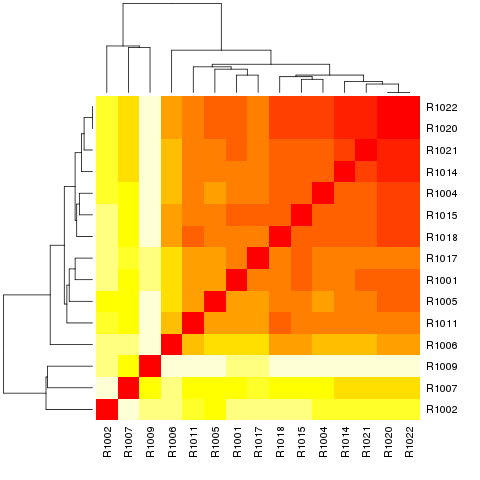

In [16]:
%%R -i gained_d4
g <- data.matrix(1*gained_d4)
library(vegan)
g <- vegdist(t(g),method='manhattan')
g <- data.matrix(g) / nrow(gained_d4)
g <- g ^ (2/3)
heatmap(g,scale='none')

In [17]:
gained_d4_lim = gained_d4.drop(['R1002','R1007','R1009','R1006'],1)

prop_gained = gained_d4_lim.sum(axis=1) / gained_d4_lim.shape[1]
prop_gained = prop_gained[prop_gained != 0]
prop_gained[prop_gained > 0.3]

Family
BAC77251        0.363636
CfxA_11         0.454545
P06571          0.363636
YP_001396002    0.363636
dtype: float64

### Does grouping reps by donor create more consistent groups?

In [18]:
metadata = pd.read_table('../crohns-metadata.tsv')


def repsByDonor(did):
    donors = metadata[['donor','subject']]
    donors = donors[donors.donor.isin([did])]
    return donors['subject'].unique()

def crunch(m):
    out = m.sum(axis=1) / m.shape[1]
    #out = out[out != 0]
    #out = out.dropna()
    return(out)


crunched = {}
N = {}
for d in metadata['donor'].unique():
    if type(d) != type(''):
        continue
    reps = repsByDonor(d)
    keys = [k for k in reps if k in gained_d4.columns.values]
    N[d] = len(keys)
    crunched[d] = crunch(gained_d4[keys])
    cru = pd.Series(crunched[d])
#     print(d)
#     print(cru[cru > 0.5])
print(N)
crunched = pd.DataFrame(crunched)
crunched = crunched.fillna(0)
crunched.sum()

{'D9002': 5, 'D9001': 3, 'D9004': 3, 'D9005': 4}


D9001    26.000000
D9002    15.600000
D9004     6.666667
D9005     2.000000
dtype: float64

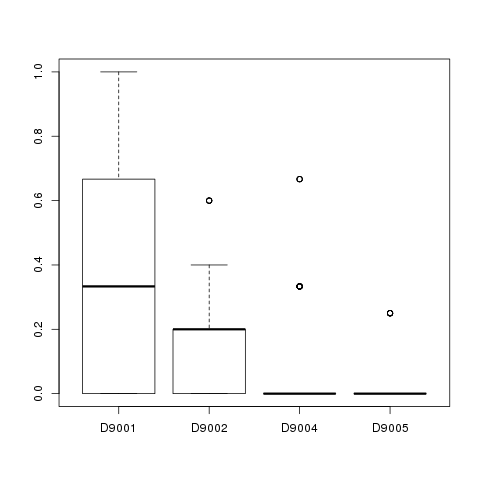

In [19]:
%%R -i crunched
cr <- crunched[apply(crunched,1,function(r){sum(r) > 0}),]
boxplot(cr)

### Do donors posses the gene families their recipients gain?

In [20]:
sbres = glob('../shortbred/FMTchrons2/donors/*results.txt')

counts = {}
for fname in sbres:
    tbl = pd.read_table(fname,header=0,index_col=0)
    tblname = fname.split('/')[-1]
    donor = tblname.split('.')[0]
        
    counts[donor] = tbl['Count']

donors = pd.DataFrame(counts)
donors_present = donors.applymap(lambda x: x > 0)

In [21]:
print(donors_present.shape)
print(crunched.shape)
masked_crunched = donors_present * crunched.applymap(lambda x: -1 if x==0 else x)
masked_crunched[ (masked_crunched.T != 0).any()]

(849, 4)
(849, 4)


,D9001,D9002,D9004,D9005
Family,,,,
AAA22905,-1.000000,0.4,-1.000000,0.00
AAB51122,-1.000000,0.2,-1.000000,-1.00
AAD42180,-0.000000,-0.0,-0.000000,-1.00
AAD42184,-0.000000,-0.0,-1.000000,-1.00
ABF69686,0.000000,-1.0,0.333333,0.25
ABG36114,-1.000000,-1.0,-1.000000,-1.00
ABN80187,0.333333,-1.0,-1.000000,-1.00
ABP68837,-0.000000,-1.0,-0.000000,-0.00
ANT6_1,0.000000,-1.0,-0.000000,-0.00


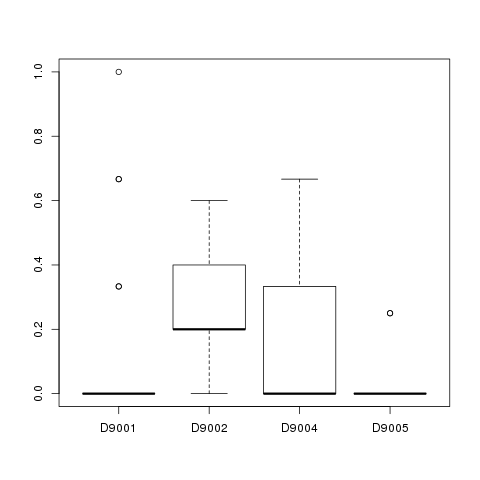

In [22]:
%%R -i masked_crunched
mcr <- masked_crunched[apply(masked_crunched,1,function(r){sum(r) > 0}),]
mcr <- apply(mcr,1:2, function(x){ifelse(x < 0, 0,x)})
boxplot(mcr)

# Does average Genome size change with FMT? 

In [23]:
samplelist = pd.read_table('../crohns.samplelist.edited.csv',header=0,index_col=0)
mcs = glob('../microbe_census/crohns/*result.txt')
ags = {}
for mc in mcs:
    srr = mc.split('/')[-1].split('.')[0]
    tpt = samplelist['time point'][srr].strip()
    sid = samplelist['subject id'][srr].strip()
    if tpt not in ags:
        ags[tpt] = {}
    with open(mc) as mcf:
        for line in mcf:
            if 'average_genome_size' in line:
                ags[tpt][sid] = float(line.split(':')[1].strip())
                
ags = pd.DataFrame(ags)
ags

,4 weeks after FMT,8 weeks after FMT,NA,pre-FMT
D9001,NaN,NaN,5.216310e+06,NaN
D9002,NaN,NaN,3.974634e+06,NaN
D9004,NaN,NaN,6.024578e+06,NaN
D9005,NaN,NaN,4.324684e+06,NaN
R1001,4.645992e+06,5.289152e+06,NaN,3.099864e+06
R1002,3.461524e+06,3.521965e+07,NaN,3.653556e+07
R1003,3.998326e+06,4.063639e+06,NaN,NaN
R1004,3.393182e+06,3.516365e+06,NaN,3.546223e+06
R1005,5.086653e+06,4.245591e+06,NaN,5.538837e+06
R1006,4.561797e+06,4.441104e+06,NaN,4.802589e+06


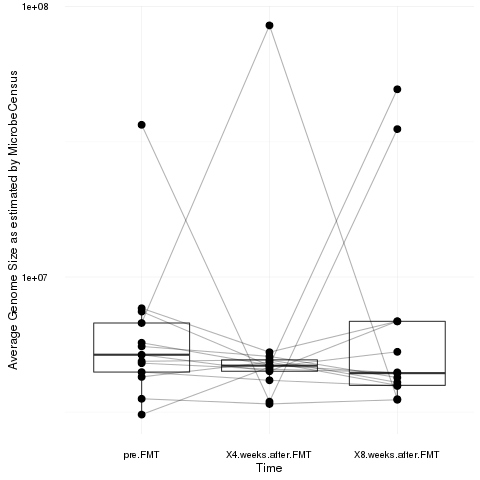

In [24]:
%%R -i ags

ags <- ags[,c(4,1,2)]
ags <- ags[!is.na(apply(ags,1,sum)),]
ags <- cbind(rownames(ags),ags)
ags <- melt(data.frame(ags))
agsBox <- ggplot(ags, aes(x=variable,y=value)) +
        geom_boxplot() +
        geom_point(size=3) +
        ylab("Average Genome Size as estimated by MicrobeCensus") +
        xlab("Time")+
        geom_line(aes(group=rownames.ags.),alpha=0.3) + 
        scale_y_log10() +
        theme_minimal() 
print(agsBox)

# Can donors be inferred from taxa?

In [25]:
import pandas as pd
from glob import glob
import numpy as np
from rpy2.robjects import pandas2ri
pandas2ri.activate()


samplelist = pd.read_table('../crohns.samplelist.edited.csv',header=0,index_col=0)
mp2s = glob('../metaphlan2/crohns/*results.txt')
mp2Pnl = {}

for mp2 in mp2s:
    srr = mp2.split('/')[-1]
    srr = srr.split('.')[0]
    sid = samplelist['subject id'][srr].strip()
    if sid not in mp2Pnl:
        mp2Pnl[sid] = {}
    tpt = samplelist['time point'][srr].strip()
    mp2Res = pd.Series.from_csv(mp2,sep='\t')
    mp2Pnl[sid][tpt] = mp2Res 

mp2Pnl = pd.Panel(mp2Pnl)
print(mp2Pnl.shape)
mp2Pnl = mp2Pnl.filter(regex='.g__\w+$',axis=1)
taxaw4 = mp2Pnl.minor_xs(mp2Pnl.minor_axis[1])
taxaw4 = taxaw4.dropna(axis=1,how='all').dropna(axis=0,how='all')
taxaw4 = taxaw4.fillna(0)
taxaw4.to_csv('temp')

(22, 788, 4)


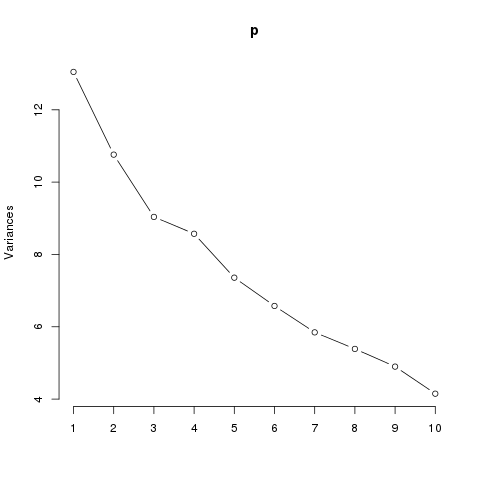

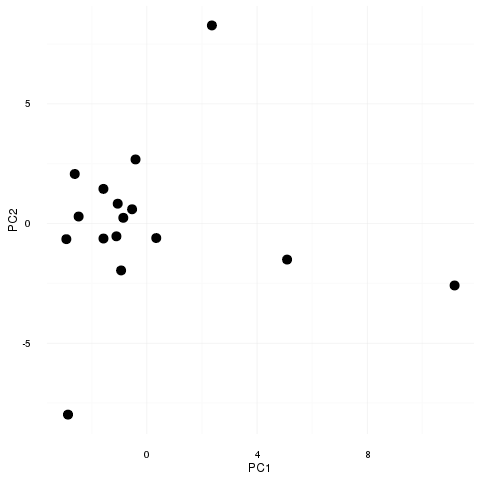

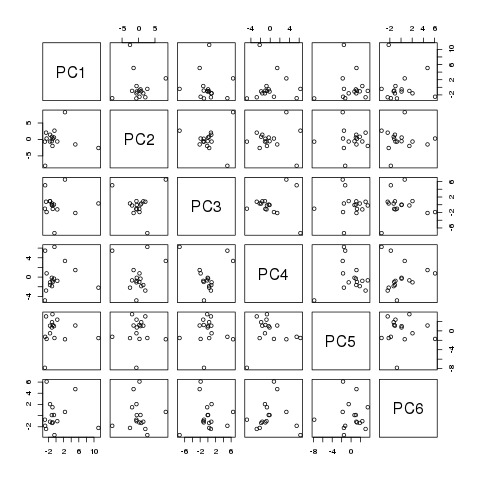

In [26]:
%%R

t <- read.table('temp',sep=',',header=T)
rownames(t) <- t[,'X']
t <- t[,2:17]


p <- prcomp(t(t),center=T,scale=T)

plot(p,type='l')
p <- data.frame(p$x[,1:6])
# p <- cbind(timepoints,p)
# p <- cbind(repNames,p)
#print(p)


p12 <- ggplot(p,aes_string(x='PC1',y='PC2')) +
                    geom_point(size=4) +
                    theme_minimal()

print(p12)


pairs(p)

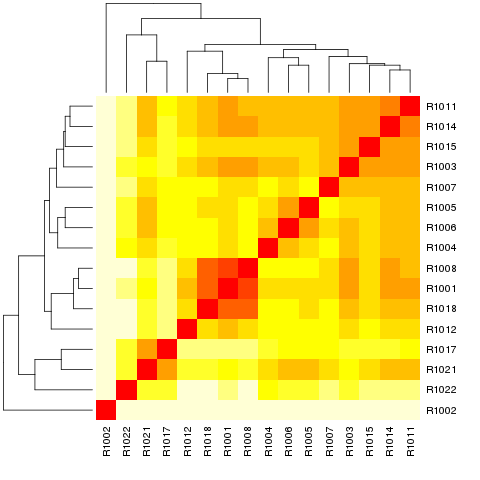

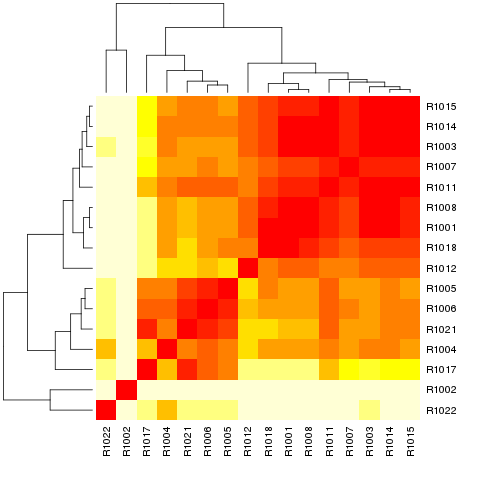

In [27]:
%%R 


make_jsd_matrix <- function(n){

    m <- matrix(nrow=ncol(n),ncol=ncol(n))

    for (i in 1:ncol(n)){
        for (j in 1:ncol(n)){
            m[i,j] <- jsd(n[,i],n[,j])
        }
     }
    colnames(m) <- colnames(n)
     rownames(m) <- colnames(n)
     return(m)
}

jsd <- function(a,b){
    anorm <- a/sum(a)
    bnorm <- b/sum(b)
     m <- (anorm+bnorm)/2
     div <- kld(anorm,m)/2 + kld(bnorm,m)/2
     dist <- sqrt(div)
     return(dist) 
}

kld <- function(a,b){
     l <- log(a/b, 2)
     l[is.na(l)] <- 0
     l[is.infinite(l)] <- 0

    return( sum( a * l))
}

make_cos_matrix <- function(n){

    m <- matrix(nrow=ncol(n),ncol=ncol(n))

    for (i in 1:ncol(n)){
        for (j in 1:ncol(n)){
            m[i,j] <- cos(n[,i],n[,j])
        }
     }
    colnames(m) <- colnames(n)
     rownames(m) <- colnames(n)
     return(m)
}

cos <- function(a,b){
    dprod <- a %*% b
    magprod <- sqrt(sum(a %*% a)) * sqrt(sum(b %*% b))
    
     return(1 - (dprod/magprod)) 
}

t_jsd <- make_jsd_matrix(t)
t_cos <- make_cos_matrix(t)
heatmap(t_jsd, scale='none')
heatmap(t_cos,scale='none')